# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [30]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/"
filename = "100zloty.jpg"
if not os.path.exists(filename) :
    r = requests.get(url + filename, allow_redirects=True)
    open(filename, "wb").write(r.content)

In [43]:
def render_image(image_gs, colspace="Greys", title=""):
  _, ax = plt.subplots()
  ax.set_title(title)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(image_gs, cmap=colspace)
  plt.show()

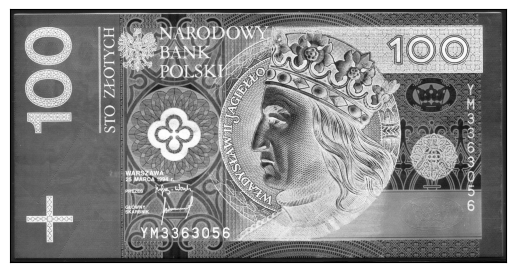

In [44]:
bill = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
render_image(bill)

In [35]:
def decompose(image, n):
  shift = 1 << n
  return cv2.bitwise_and(image, shift)

## Dekompozycja

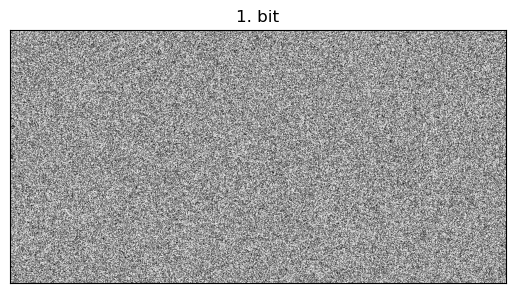

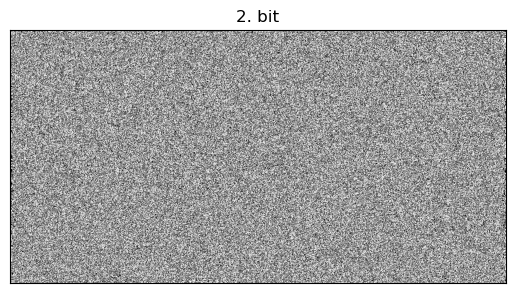

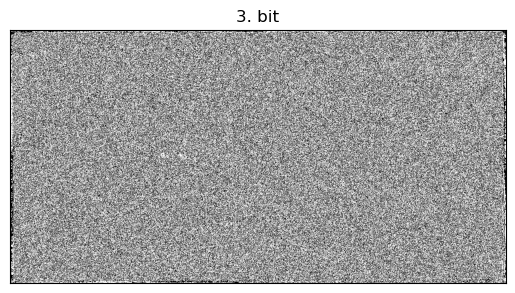

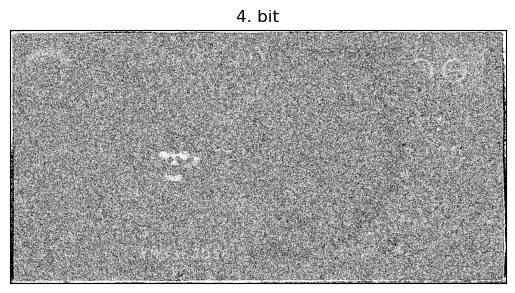

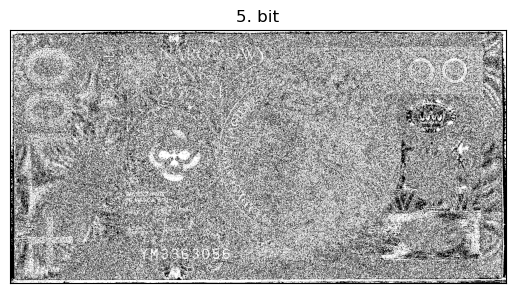

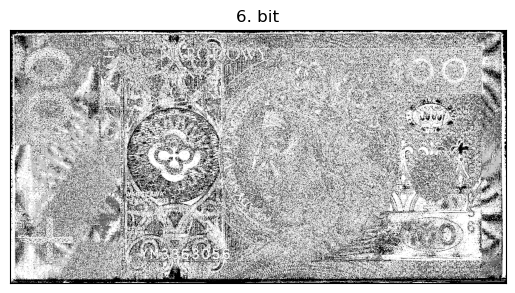

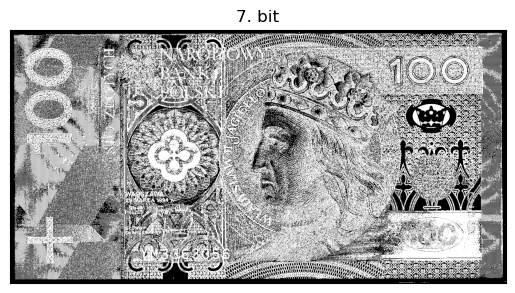

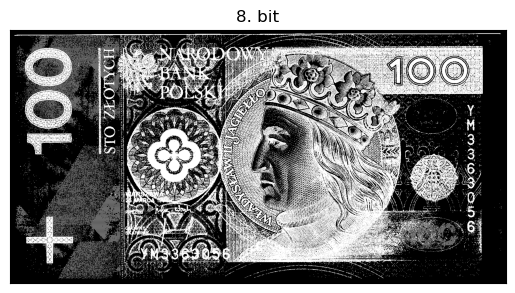

In [46]:
for shift in range(8):
  render_image(decompose(bill, shift), title=f"{shift + 1}. bit")